In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from nose.tools import *
import cv2
import skimage.io
os.environ['PROJ_LIB'] = r'c:\Users\o.yordanova\anaconda3\pkgs\basemap-1.2.2-py38h6201b6a_3\Library\share'
from mpl_toolkits.basemap import Basemap



In [4]:
earthquake_data = pd.read_csv("data\database.csv")
earthquake_data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [5]:
earthquake_data = earthquake_data[["Date", "Time", "Latitude", "Longitude", "Magnitude", "Depth"]]
earthquake_data

,Date,Time,Latitude,Longitude,Magnitude,Depth
0,01/02/1965,13:44:18,19.2460,145.6160,6.0,131.60
1,01/04/1965,11:29:49,1.8630,127.3520,5.8,80.00
2,01/05/1965,18:05:58,-20.5790,-173.9720,6.2,20.00
3,01/08/1965,18:49:43,-59.0760,-23.5570,5.8,15.00
4,01/09/1965,13:32:50,11.9380,126.4270,5.8,15.00
...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,5.6,12.30
23408,12/28/2016,09:13:47,38.3777,-118.8957,5.5,8.80
23409,12/28/2016,12:38:51,36.9179,140.4262,5.9,10.00
23410,12/29/2016,22:30:19,-9.0283,118.6639,6.3,79.00


In [6]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time
earthquake_data = earthquake_data.drop(index = dt_info[dt_info.str.len() > 20].index)
earthquake_data["DateTime"] = pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)
earthquake_data

,Date,Time,Latitude,Longitude,Magnitude,Depth,DateTime
0,01/02/1965,13:44:18,19.2460,145.6160,6.0,131.60,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.8630,127.3520,5.8,80.00,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.5790,-173.9720,6.2,20.00,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.0760,-23.5570,5.8,15.00,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.9380,126.4270,5.8,15.00,1965-01-09 13:32:50
...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,5.6,12.30,2016-12-28 08:22:12
23408,12/28/2016,09:13:47,38.3777,-118.8957,5.5,8.80,2016-12-28 09:13:47
23409,12/28/2016,12:38:51,36.9179,140.4262,5.9,10.00,2016-12-28 12:38:51
23410,12/29/2016,22:30:19,-9.0283,118.6639,6.3,79.00,2016-12-29 22:30:19


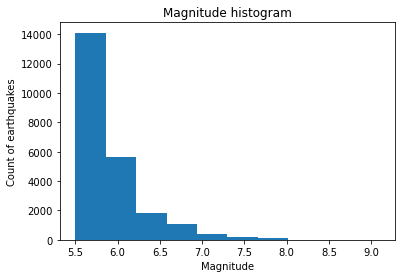

In [7]:
plt.hist(earthquake_data.Magnitude)
plt.xlabel('Magnitude')
plt.ylabel('Count of earthquakes')
plt.title('Magnitude histogram')
plt.show()

In [8]:
earthquake_data.shape

(23409, 7)

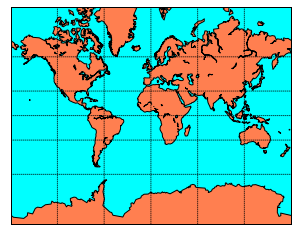

In [9]:
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")
plt.show()

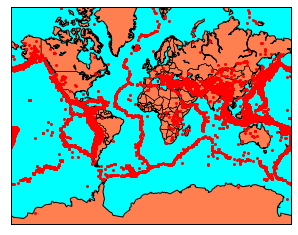

In [20]:
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
x, y = m(earthquake_data.Longitude.tolist(),earthquake_data.Latitude.tolist())
m.plot(x, y, "o", markersize = 2, color = "red")
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawmapboundary(fill_color = "aqua")
m.drawcountries()
plt.show()



In [21]:
volcanic_erp = pd.read_csv("data\database-v.csv")
volcanic_erp

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


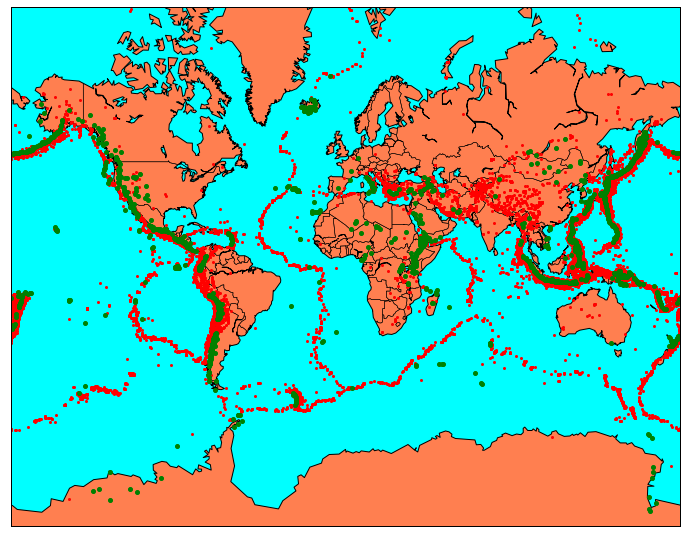

In [27]:
plt.rcParams["figure.figsize"] = (12,10)
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
x, y = m(earthquake_data.Longitude.tolist(),earthquake_data.Latitude.tolist())
m.plot(x, y, "o", markersize = 2, color = "red")

x_volc, y_volc = m(volcanic_erp.Longitude.tolist(),volcanic_erp.Latitude.tolist())
m.plot(x_volc, y_volc, "o", markersize = 4, color = "green")

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawmapboundary(fill_color = "aqua")
m.drawcountries()

plt.show()


